In [1]:
import sys
sys.path.append('../')
import numpy as np
from numpy import exp, log, log10, cos, sin, pi, cosh, sinh , sqrt, amin, amax, mean, dot, power
import h5py, os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from matplotlib import pyplot as plt
import scipy, time, multiprocessing
from scipy import interpolate
from scipy.optimize import curve_fit

In [2]:
%load_ext autoreload
%autoreload 2
from relation import Scaling
from relation import Distribution

In [3]:
s = Scaling('140','',)
dc = Distribution(60,'140','')
dg = Distribution(15,'140','')

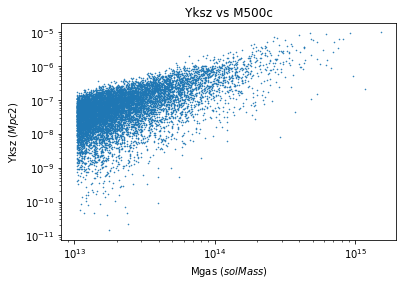

In [4]:
s.plot_Y_M()

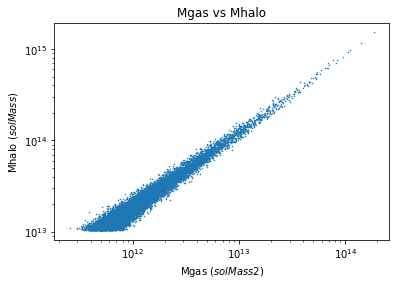

In [5]:
s.gas_halo_relation()

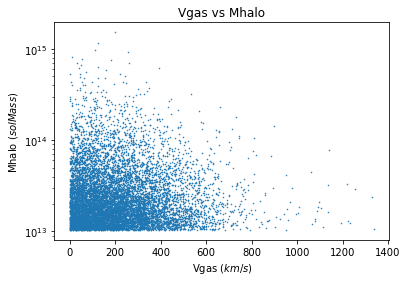

In [7]:
s.velo_halo_relation('z')

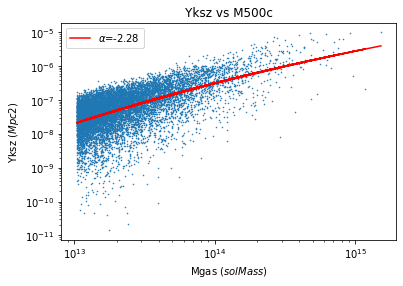

In [7]:
s.plot_Y_M_fit()

In [8]:
Y,M = s.Y_M()

In [14]:
inp = np.zeros((len(M),4))
inp[:,0] = np.log(s.Mhalo.value)
inp[:,1] = np.log(s.Mstar.value)
inp[:,2] = np.array(dc.dataframe['cluster_number_density'].values)
inp[:,3] = np.array(dg.dataframe['galaxy_number_density'].values)

[]

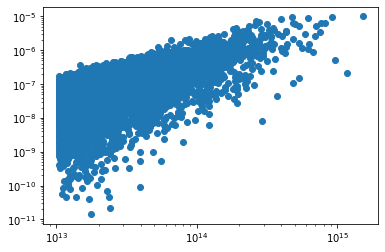

In [10]:
plt.scatter(M.value,Y.value)
plt.semilogy()
plt.semilogx()

In [15]:
regr = RandomForestRegressor(max_depth=50, random_state=0,min_samples_leaf=5,n_estimators=50,n_jobs=-1)

In [16]:
regr.fit(inp, np.log(Y.value))

RandomForestRegressor(max_depth=50, min_samples_leaf=5, n_estimators=50,
                      n_jobs=-1, random_state=0)

In [19]:
regr.feature_importances_

array([0.63948162, 0.14420443, 0.09473506, 0.12157889])

<ipython-input-20-835f0d6d4316>:2: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(M.value),np.log(regr.predict(inp)),'o',alpha=0.1,c='r')


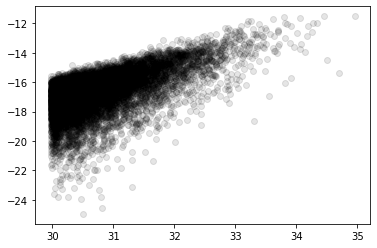

In [20]:
plt.plot(np.log(M.value),np.log(Y.value),'o',alpha=0.1,c='k')
plt.plot(np.log(M.value),np.log(regr.predict(inp)),'o',alpha=0.1,c='r')

In [71]:
inp_reg = np.zeros((len(M),3))
inp_reg[:,0] = s.Mgas.value
inp_reg[:,1] = s.Vlos.value
inp_reg[:,2] = np.array(d.dataframe['number_density'])


In [21]:
from pysr import PySRRegressor

In [22]:
model = PySRRegressor(
    niterations=40,
    binary_operators=["+", "-", "*", "/",'pow'],
    unary_operators=["neg","exp","log"],
    #denoise=True,
    procs=7,
    model_selection="best")

In [23]:
model.fit(inp, np.log(Y.value),weights=np.power(s.Mhalo.value,1/2))

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/pysr/sr.py:1743: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                         -16.304268   
	1   >>>>  2.986222e-01                                   (x0 - 47.385227)   
	2         4.079374e-07                    ((x0 - 47.16259) + -0.22264217)   
	3         6.169355e-03                       ((log(x0) + x0) - 50.821083)   
	4         1.596364e-02            ((x0 + -47.61354) - (x3 * -0.06515078))   
	5         5.535634e-06         ((x0 - 47.612427) + neg(x3 * -0.06493176))   
	6         3.298767e-03     (((x0 - x1) + (-1099.3922 / x0)) - -15.719337)   
	7         1.839817e-03  ((log(x0) + ((x3 + -1099.3977) / x0)) - -15.54...   
	8         1.219545e-06  ((log(x0 - 0.019787548) + ((x3 + -1099.3977) /...   
	9         5.282301e-05  ((log(x0) + ((-1099.3977 + (log(x3) + x3)) / x...   
	10        1.359799e-03  ((log(x0 + (x3 * 1.5866952)) + ((x2 + -1100.88...   
	11        1.908243e-06  ((log(x0 + ((x3 - (0.06261983 / x3)) * 1.58669...   
	12        6.411740e-06  ((log(x0 + ((x3 - neg(-0.1335023 / x3)) * 1.58...   
	
	        loss  complexity  
	0   2.449905           1  
	1   1.348246           3  
	2   1.348245           5  
	3   1.339953           6  
	4   1.318733           7  
	5   1.318725           8  
	6   1.314382           9  
	7   1.311966          10  
	8   1.311963          12  
	9   1.311894          13  
	10  1.310111          14  
	11  1.310101          18  
	12  1.310093          19  
]

In [25]:
model.sympy()

x0 - 47.385227

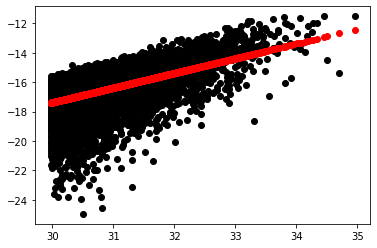

In [27]:
plt.scatter(np.log(M.value),np.log(Y.value),c='k')
plt.scatter(np.log(M.value),model.predict(inp),c='r')